### ASSIGNMENT 3

Topic: Data Cleaning and Preparation & Data Wrangling


Group members:

1. Chua Hun Ho A18CS0050
2. Jasmine Chan Yuan Qi A18CS0083
3. Khoo Jie Xuan A18CS0091

TASK 1:

1.	Read the “Diabetes Dataset.csv” and save the data into a DataFrame.


In [1]:
import pandas as pd
df = pd.read_csv('Diabetes Dataset.csv')
df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic,Triceps,Insulin,BMI,Diabetes_Pedigree,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33


2.	What is the shape of the DataFrame?


In [2]:
df.shape

(768, 8)

3.	Get the number of missing values for each column.

In [3]:
df.isnull().sum()

No_Times_Pregnant    111
Plasma_Glucose         7
Diastolic             36
Triceps              228
Insulin              375
BMI                   14
Diabetes_Pedigree      1
Age                    0
dtype: int64

4.	Fill in all the missing values in column No_Times_Pregnant with value 1.

In [4]:
df['No_Times_Pregnant'].fillna(1, inplace = True)
df.isnull().sum()

No_Times_Pregnant      0
Plasma_Glucose         7
Diastolic             36
Triceps              228
Insulin              375
BMI                   14
Diabetes_Pedigree      1
Age                    0
dtype: int64

5.	Drop all rows which contains less than 4 observation values.

In [5]:
df.dropna(thresh=4, inplace = True)
df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic,Triceps,Insulin,BMI,Diabetes_Pedigree,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,1.0,137.0,40.0,35.0,168.0,43.1,2.288,33


6.	Fill in all the missing values in below columns with the given values or methods:
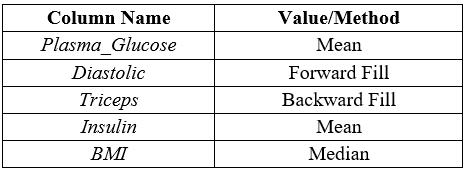

In [6]:
df['Plasma_Glucose'].fillna(df['Plasma_Glucose'].mean(), inplace = True)

In [7]:
df['Diastolic'].fillna(method='ffill', inplace = True)

In [8]:
df['Triceps'].fillna(method='bfill', inplace= True)

In [9]:
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)

In [10]:
df['BMI'].fillna(df['BMI'].median(), inplace = True)

7.	Check back the number of missing values for each column. It should now be 0 for all the columns.

In [11]:
df.isnull().sum()

No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic            0
Triceps              0
Insulin              0
BMI                  0
Diabetes_Pedigree    0
Age                  0
dtype: int64

8.	Bin the age into below categories. How many patients with diabetes for each category? 
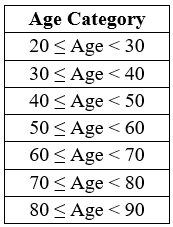

In [12]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
diabetes = pd.cut(df['Age'], bins, right=False)
pd.value_counts(diabetes)

[20, 30)    395
[30, 40)    163
[40, 50)    118
[50, 60)     57
[60, 70)     29
[70, 80)      2
[80, 90)      1
Name: Age, dtype: int64

TASK 2:
1.	Read the “Live births by state and sex.xlsx” and save the data into a DataFrame.


In [13]:
import pandas as pd
live_birth = pd.read_excel('Live births by state and sex.xlsx')
live_birth

,Year,State,Sex,Number of Live births
0,2018,Johor,Female,29428
1,2018,Johor,Male,31656
2,2018,Kedah,Female,17181
3,2018,Kedah,Male,18462
4,2018,Kelantan,Female,18376
...,...,...,...,...
313,2009,Terengganu,Male,12152
314,2009,W.P. Kuala Lumpur,Female,12612
315,2009,W.P. Kuala Lumpur,Male,13252
316,2009,W.P. Labuan,Female,804


2.	Read another file named “Death by state and sex.xlsx” and save it into another DataFrame.

In [14]:
death_record = pd.read_excel('Death by state and sex.xlsx')
death_record

,Year,State,Sex,Number of death
0,2018,Johor,Female,8733
1,2018,Johor,Male,12384
2,2018,Kedah,Female,6336
3,2018,Kedah,Male,8216
4,2018,Kelantan,Female,4984
...,...,...,...,...
313,2009,Terengganu,Male,3491
314,2009,W.P. Kuala Lumpur,Female,2662
315,2009,W.P. Kuala Lumpur,Male,3808
316,2009,W.P. Labuan,Female,94


3.	Merge both files.

In [15]:
newdf = pd.merge(live_birth, death_record)
newdf

,Year,State,Sex,Number of Live births,Number of death
0,2018,Johor,Female,29428,8733
1,2018,Johor,Male,31656,12384
2,2018,Kedah,Female,17181,6336
3,2018,Kedah,Male,18462,8216
4,2018,Kelantan,Female,18376,4984
...,...,...,...,...,...
299,2009,Terengganu,Male,12152,3491
300,2009,W.P. Kuala Lumpur,Female,12612,2662
301,2009,W.P. Kuala Lumpur,Male,13252,3808
302,2009,W.P. Labuan,Female,804,94


4.	Set the index as figure below.

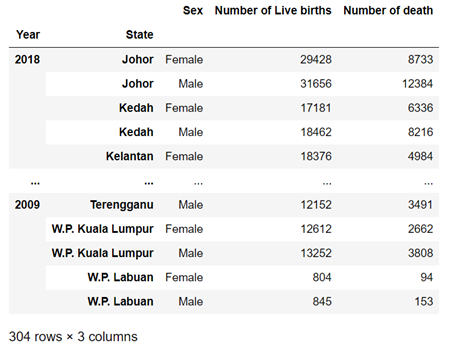

In [16]:
multiindex_df = newdf.set_index(['Year', 'State'])
multiindex_df

Sex  Number of Live births  Number of death
Year State                                                            
2018 Johor              Female                  29428             8733
     Johor                Male                  31656            12384
     Kedah              Female                  17181             6336
     Kedah                Male                  18462             8216
     Kelantan           Female                  18376             4984
...                        ...                    ...              ...
2009 Terengganu           Male                  12152             3491
     W.P. Kuala Lumpur  Female                  12612             2662
     W.P. Kuala Lumpur    Male                  13252             3808
     W.P. Labuan        Female                    804               94
     W.P. Labuan          Male                    845              153

[304 rows x 3 columns]

5.	Display the number of live births and number of deaths for all the years (2009-2018) as below.
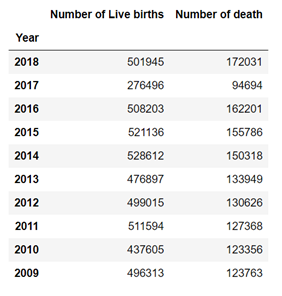


In [17]:
multiindex_df.groupby('Year').sum().sort_values(by=['Year'], ascending=False)

,Number of Live births,Number of death
Year,,
2018,501945,172031
2017,276496,94694
2016,508203,162201
2015,521136,155786
2014,528612,150318
2013,476897,133949
2012,499015,130626
2011,511594,127368
2010,437605,123356


6.	Swap the level as figure below.
 
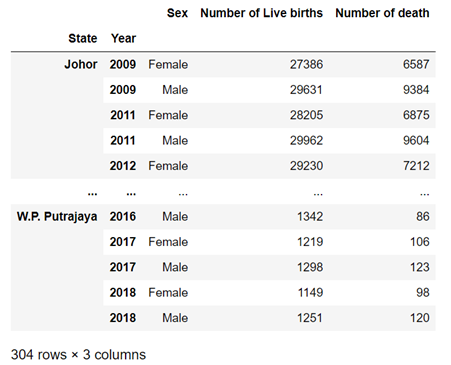

In [18]:
newdf = newdf.set_index(['State', 'Year'])
newdf

Sex  Number of Live births  Number of death
State             Year                                                
Johor             2018  Female                  29428             8733
                  2018    Male                  31656            12384
Kedah             2018  Female                  17181             6336
                  2018    Male                  18462             8216
Kelantan          2018  Female                  18376             4984
...                        ...                    ...              ...
Terengganu        2009    Male                  12152             3491
W.P. Kuala Lumpur 2009  Female                  12612             2662
                  2009    Male                  13252             3808
W.P. Labuan       2009  Female                    804               94
                  2009    Male                    845              153

[304 rows x 3 columns]

7.	Display the number of live births and number of deaths for all states as below.
 
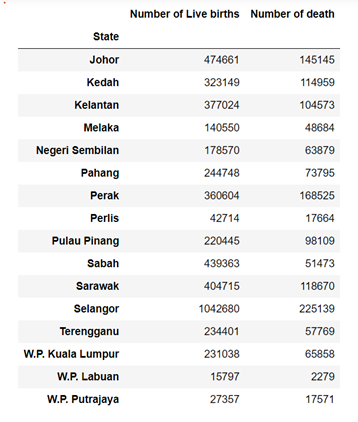

In [19]:
newdf.groupby('State').sum()

,Number of Live births,Number of death
State,,
Johor,474661,145145
Kedah,323149,114959
Kelantan,377024,104573
Melaka,140550,48684
Negeri Sembilan,178570,63879
Pahang,244748,73795
Perak,360604,168525
Perlis,42714,17664
Pulau Pinang,220445,98109
